### Smoothed Bathymetry withouth SVB - Domain 04 

Even longer domain to the north and extended to the west to see if there are any propagaing signals north of the bay. This domain includes the whole Santa Rosa Ridge, which was cut off half way in domain 3.

In this bathymetry we REMOVE SEBASTIAN VIZCCAINO BAY.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 4 is bounded by

* north: 35.0 N 
* south: 27.0 N
* east: -121.0 W
* west -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon

Grid
* Horizontal resolution: -0.01563 deg (~1.7 km, check!)
* nx=448, ny=512, nz=100, 
* Boundaries open to the W and S.

OPEN BOUNDARIES: North, West and South

In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_10_Feb_2021_824964c84a3d/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  after removing the cwd from sys.path.


In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,lati in zip(range(len(lat)),lat):
    print(ii,lati)

0 26.00208333333333
1 26.006249999999994
2 26.01041666666667
3 26.014583333333334
4 26.018749999999997
5 26.02291666666666
6 26.027083333333337
7 26.03125
8 26.035416666666663
9 26.039583333333326
10 26.043750000000003
11 26.047916666666666
12 26.05208333333333
13 26.05624999999999
14 26.06041666666667
15 26.06458333333333
16 26.068749999999994
17 26.07291666666667
18 26.077083333333334
19 26.081249999999997
20 26.08541666666666
21 26.089583333333337
22 26.09375
23 26.097916666666663
24 26.102083333333326
25 26.106250000000003
26 26.110416666666666
27 26.11458333333333
28 26.11874999999999
29 26.12291666666667
30 26.12708333333333
31 26.131249999999994
32 26.13541666666667
33 26.139583333333334
34 26.143749999999997
35 26.14791666666666
36 26.152083333333337
37 26.15625
38 26.160416666666663
39 26.164583333333326
40 26.168750000000003
41 26.172916666666666
42 26.17708333333333
43 26.18124999999999
44 26.18541666666667
45 26.18958333333333
46 26.193749999999994
47 26.19791666666667
48 2

1267 31.28125
1268 31.285416666666663
1269 31.289583333333326
1270 31.293750000000003
1271 31.297916666666666
1272 31.30208333333333
1273 31.30624999999999
1274 31.31041666666667
1275 31.31458333333333
1276 31.318749999999994
1277 31.32291666666667
1278 31.327083333333334
1279 31.331249999999997
1280 31.33541666666666
1281 31.339583333333337
1282 31.34375
1283 31.347916666666663
1284 31.352083333333326
1285 31.356250000000003
1286 31.360416666666666
1287 31.36458333333333
1288 31.36874999999999
1289 31.37291666666667
1290 31.37708333333333
1291 31.381249999999994
1292 31.38541666666667
1293 31.389583333333334
1294 31.393749999999997
1295 31.39791666666666
1296 31.402083333333337
1297 31.40625
1298 31.410416666666663
1299 31.414583333333326
1300 31.418750000000003
1301 31.422916666666666
1302 31.42708333333333
1303 31.43124999999999
1304 31.43541666666667
1305 31.43958333333333
1306 31.443749999999994
1307 31.44791666666667
1308 31.452083333333334
1309 31.456249999999997
1310 31.4604166

In [5]:
## Set domain corners
lon1 = 239
lon2 = 1919
lat1 = 240
lat2 = 2160

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1325:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-750:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


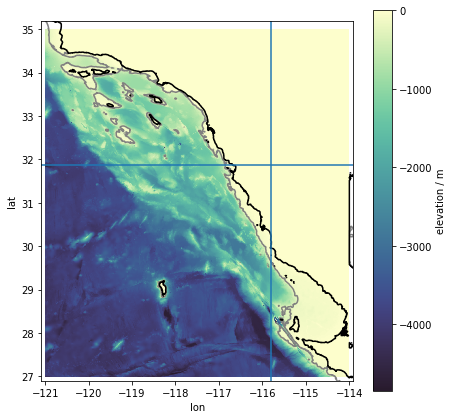

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-121.1,-113.9)
ax.set_ylim(26.9,35.2)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [8]:
nx = 448
ny = 512

lon_vect = np.round(np.linspace(-121.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.0,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [9]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


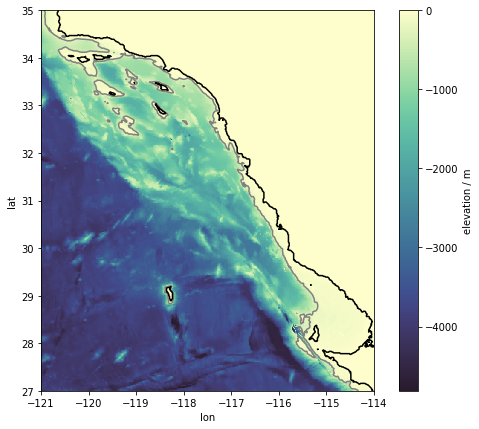

In [10]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [11]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [12]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


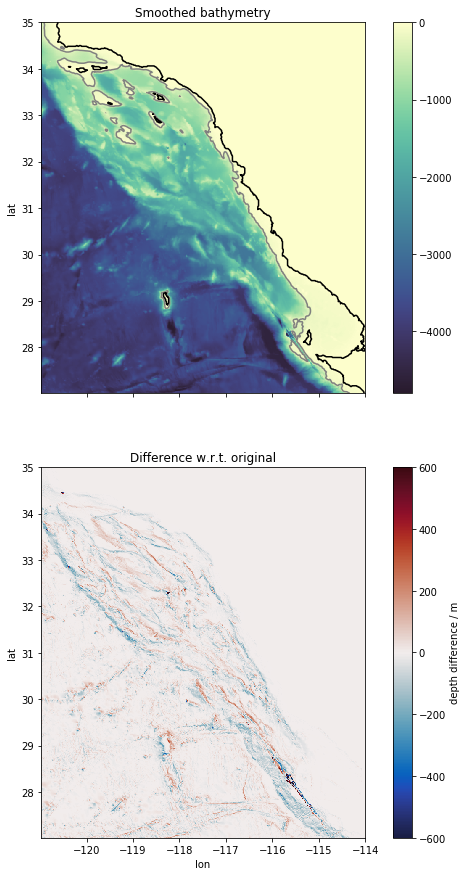

In [13]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [14]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

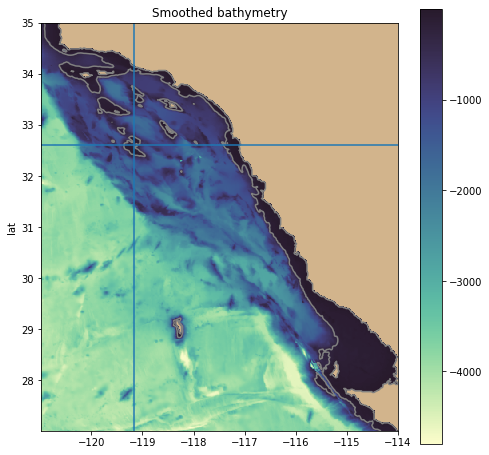

In [94]:
fig, (ax) = plt.subplots(1,1,figsize=(8,8), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
depths = np.ma.masked_array(smooth_bathy, mask=mask)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[0,250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


## Remove the bay

First try: Take shelf slope at A and propagate it south along the shelf break isobath for every j-index (N-S index) up to Punta Euguenia.

The depth at A1 is -269.98 m and at A2 is nan m


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


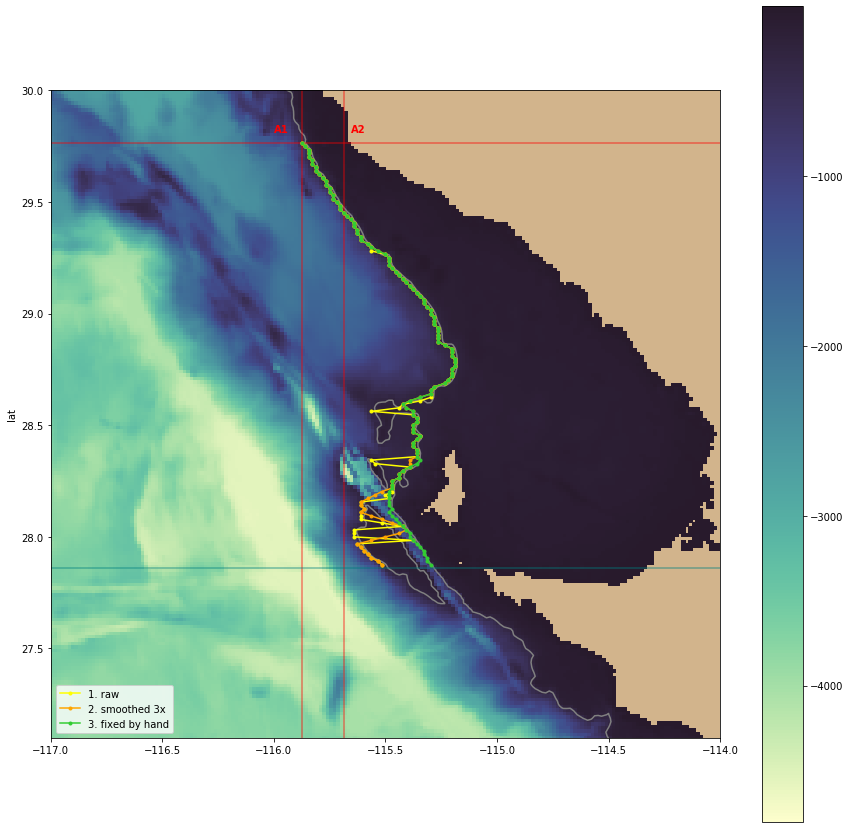

In [239]:
isobath = 250 # shelf break depth

# Initial and final points at A to get the slope
aj = 177
ai1 = 328
ai2 = 340
print('The depth at A1 is %1.2f m and at A2 is %1.2f m' %(depths[aj,ai1],depths[aj,ai2]))

# Punta Eugenia j index
pej = 55

# For each y index, find the x index of the point closest to 250 m isobath.
raw_iind = np.argmin(np.abs(depths[pej:aj,ai1-20:]+isobath), axis=1)

iind=raw_iind.copy()

# Smooth out jumps in 3 passes
for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) >= 10:
        iind[ii+1] = max(iind[ii],iind[ii+1])#int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 4:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 3:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

# Fix the rest by hand
iind_fixed = iind.copy()
iind_fixed[:2] = iind_fixed[:2]+14
iind_fixed[2:4] = iind_fixed[2:4]+16
iind_fixed[4:7] = iind_fixed[4:7]+17
iind_fixed[7] = iind_fixed[7]+12
iind_fixed[8] = iind_fixed[8]+7
iind_fixed[9] = iind_fixed[9]+3
iind_fixed[10] = iind_fixed[10]+0
iind_fixed[12] = iind_fixed[12]+2
iind_fixed[13] = iind_fixed[13]+4
iind_fixed[14] = iind_fixed[14]+6
iind_fixed[15] = iind_fixed[15]+8
iind_fixed[16:19] = iind_fixed[16:19]+8
iind_fixed[19] = iind_fixed[19]+6
iind_fixed[20] = iind_fixed[20]+4
iind_fixed[21] = iind_fixed[21]+2
iind_fixed[29] = iind_fixed[29]+2
iind_fixed[30] = iind_fixed[30]+3

# Add slope (depths) from A at each iind
depths_noSVB = depths.copy()
for ii, ind in zip(range(pej,aj),iind_fixed):
    depths_noSVB[ii,ind:ind+(ai2-ai1)]=depths[ii,ai1:ai2]

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342],lat_vect[180],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320],lat_vect[180],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[raw_iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='yellow', label='1. raw')
ax.plot(lon_vect[iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='orange', label='2. smoothed 3x')
ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')

ax.contour(lon_vect[1:],lat_vect[1:], -depths, colors='0.5', levels=[0,250])
ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

Once we have the indices of the shelf break, we propagate the shelf profile from A south up to Punta Eugenia:

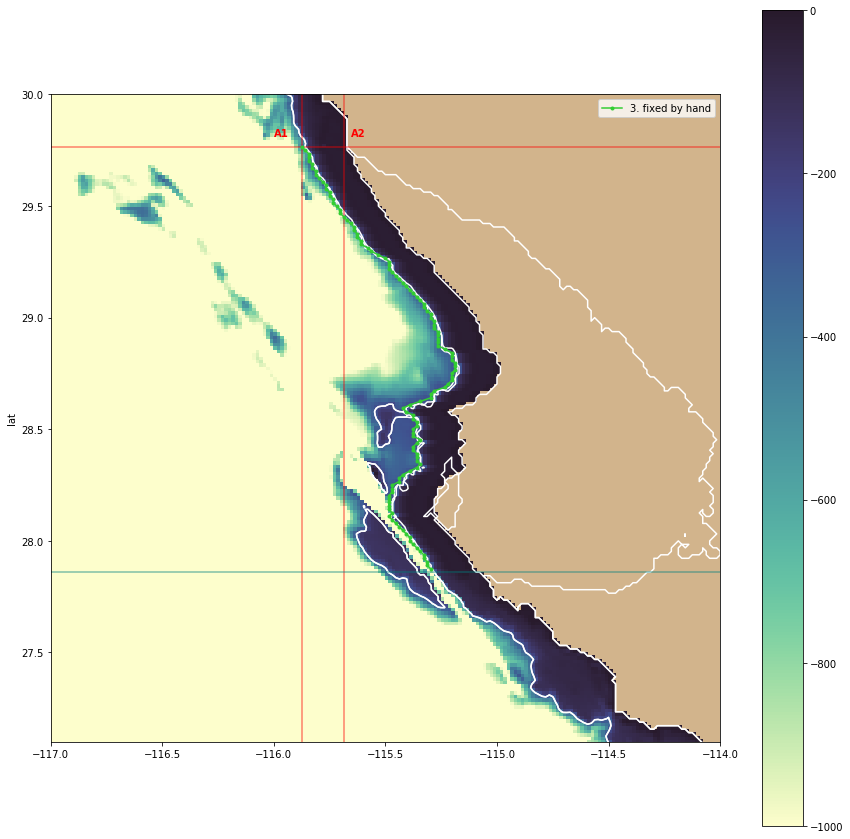

In [276]:
# Add slope (depths) from A at each iind
bathy_noSVB = smooth_bathy.copy()
for ii, ind in zip(range(pej-1,aj),iind_fixed):
    bathy_noSVB[ii,ind+ai1-20:ind+ai1-20+(ai2+61-ai1)]=smooth_bathy[aj,ai1:ai2+61]

# Fill out missing bits in the bay
bathy_noSVB[pej-6:pej,iind_fixed[0]+ai1-3:]=0.0
bathy_noSVB[pej:pej+50,iind_fixed[0]+ai1:]=0.0

# Plot to check
mask_bat = np.ma.masked_values(bathy_noSVB,0)
mask_noSVB = np.ma.getmask(mask_bat)
depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342],lat_vect[180],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320],lat_vect[180],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0,250])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='w', levels=[0,250])

ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


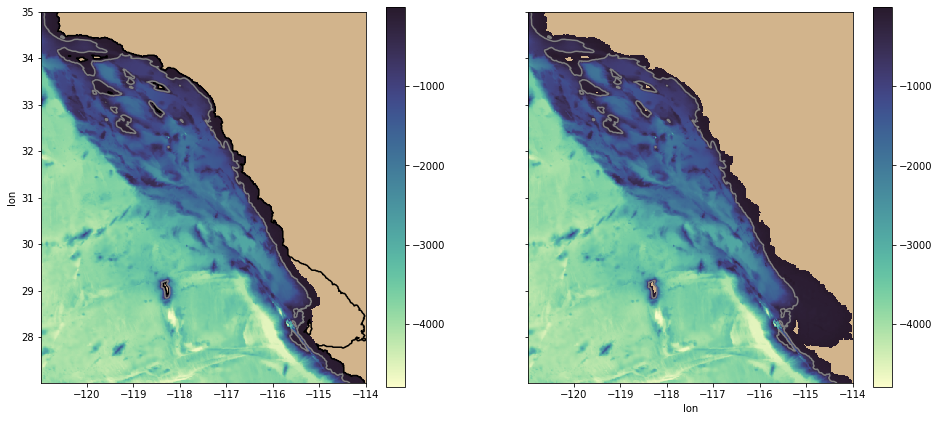

In [278]:
# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(16,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('lat')
ax.set_ylabel('lon')
ax2.set_xlabel('lon')
ax.set_aspect(1)
ax2.set_aspect(1)

### Binary file

In [279]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [280]:
dx

array([0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01

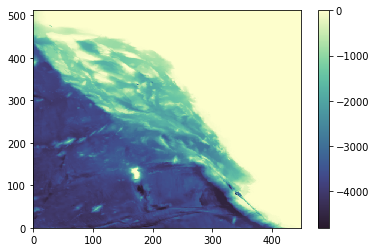

In [281]:
bathy_fname = '448x512/domain4_448x512_noSVB_bat.bin'
dx_fname = '448x512/domain4_448x512_noSVB_dx.bin'
dy_fname = '448x512/domain4_448x512_noSVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=bathy_noSVB
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

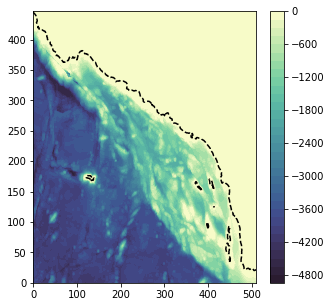

In [288]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
pc2 = ax.contour(bF, levels=[-10], colors='k')

plt.colorbar(pc,ax=ax)
